## Zoekmachines project Bogo_boys

#### Made by: Rianne Beelen, Justin Bon, Colin Bouwmeester, Jonas Heller

Student nr.: 11721472, 11045655 11867604, 11906618

Slides: https://docs.google.com/presentation/d/12V1woPPIhgXPpgj0FR2TADE3MMTkD2iP8wfdkN1L290/edit?usp=sharing

Github repository: https://github.com/joansheller/Bogo_people

Live demo: At the end of this notebook a demo. To run the demo just run the cells

<h1>Table of Contents</h1>

<li><a href='#summary'>What is our search engine about</a></li>
<li><a href='#search'>1. Search as we know it from google</a></li>
<li><a href='#advanced_search'>2. Advanced search</a></li>
<li><a href='#wordcloud'>3. The wordcloud</a></li>
<li><a href='#histogram'>4. The histogram</a></li>
<li><a href='#faceted_search'>5. Faceted search</a></li>
<li><a href='#evaluation'>6. Evaluation</a></li>
<ul>
<li><a href='#evaluation_process'>Evaluation process</a></li>
<li><a href='#conclusions evaluation'>Conclusions of evaluation process</a></li>
</ul>
<li><a href='#search_engine'>The actual search engine (and it's code)</a></li>
<li><a href='#live_demo'>Live demo</a></li>

<a id='summary'></a> 
## What is our search engine about:
We created a search engine that can search a moviescript dataset in which 617 movies are included. These movies are all acompanied by their tile, year of publishing, genre, score, characters and lines in the script. We created this dataset from five files which were in tsv format which we converted to one json file. We use elasticsearch to load our datafile and query our information needs. 

<a id='search'></a>
## 1. Search as we know it from google
We use a general search for an information need where someone does not know some of the meta information. With general search we query the same terms on title, charachter and line. We choose not to query the same term for year (because the search funcion for year was based on a range query which doesn't work with a single value for year) and genre (beacuse genre was implemented as a filter on the results already gotten by the main query. See 5. Faceted search for more information about why we did that). For the most part, the general search function preformed as expected. For example, if you were looking for the movie "Pirates of the caribbean" and you search for the term "Pirates", that movie will be the first result. 

The search enginge will rate the hits according to our own created model where title is weighted by 3, year by 2, character and review score by 1 and line on a normalized scale between 0 and 2. We chose for these weights because we thought this would most accuratly reflect the information need of the users. The scoring that is implemented is not a recognized scoring function, rather we gave weights to certain criteria that we found more important. This is very subjective. Of course in the real world machine learning would be better to get the best weights for each search term.  

We used the wikipedia module to get some general information about the found movies. However this does not always work. For example, if the movie alien is searched, the wikipedia module doesn't know what page is needed: the movie, extra terrestrials or maybe the movie francise? If this happens, we cannot give information about the movie. Also, sometimes it gets the information for the wrong page. If the movie philadelphia is searched, the wiki page for the city of philadelphia is returned.


So, appart from the two things that don't really work, our search engine preformes admirably. There are some minor flaws and not everything that we wanted to implement, is implemented but it does work as intended. The addition of the Wikipedia module also is a good source of extra information that our dataset was lacking.

<a id='advanced_search'></a>
## 2. Advanced search
The more advanced search allows users to narrow down the results by using the metadata. This gives the option to search for a specific title, charachter, line, year (range), rating (range) or genre. The year and rating are ranges and not just a single value because a range is more versatile. For example users can select a single year by setting the range to just 1 year or multiple years by setting a wider range. The same goes for rating.  
The search engine takes the queries form all of the given options and combines the search result. A document only needs to be relevant to only 1 of the options for it to be a result, making our search engine an OR search engine. However, if a document is relevant to more of the options, it gets a higher score. This works suprisingly wel in most cases. This also means that, with more options, there will be more results.  
We also implemented snippet system that shows where the search engine found the text that the user was looking for. This only works on the line search because all the other information is visible when the results are shown to the user.


One of the things that doesn't really work as intended, is the genre filter. When a users specifies a single genre, it works fine but when more genres are selected, the filter stars working as an OR search. This means a movie only needs to be one of the genres choosen by the user to get through the filter. We initially wanted this filter to work like an AND search where a movie needed to be all genres specified.


In the end, our advanced search works like the normal search. The only difference is that the user has more control over the filters. There are some things that can be fixed but for the limited time that we had, it works really well

<a id='wordcloud'></a>
## 3. The wordcloud
For the word cloud we used the package wordcloud. We setup the word cloud in a way in which it is very wide and not that tall so it fits in our results nicely. We only include words that are of font size 20 or higher so the words can be read clearly. This way if the most common words are smaller there would fit more words in the cloud.

One thing we could improve upon would be the large words that don't mean much. We already take out stopwords but words like 'knowing' or 'will' are not taken out and can occur quite a lot. The top x words mostly have a few meaningless words in them which is a shame. We could have maybe filtered them out using some sort of tf-idf ranking if we had more time.

<a id='histogram'></a>
## 4. The histogram
We create a histogram for each query where we show per year how many movies were produced. Additionaly we create a histogram of the genres of all the movies. This can create a pretty wild histogram because some movies have a lot of genres a once. The histograms create a nice overview of the results. 


<a id='faceted_search'></a>
## 5. Faceted search
For this part we created another histogram, but than based on the genre's. This histogram specifically shows how many movies there are of a certain genre among the hits.
We weren't able to get the genre's apart of the elastic search machine. We choose to do this apart because we also have movies where the genre is unknown, so to make the most of the search engine we created a separate function so that a user can also search for this.

<a id='evaluation'></a>
## 6. Evaluation
Below you can see the whole process or our evaluation. The <a href='#conclusion_evaluation'>conclusions</a> of this evaluation are at the end.

<a id='evaluation_process'></a>

**Topic 1**  
**Query:** line: "pod bay doors"  
**Description:** We're looking for a film in which the specific line: "pod bay doors" occurs. Specifically we're looking for the movie 2001: a space odyssey, the line is looked up using advanced search.  
judge 1: 1,0,0,0,0,0,0,0,0,0  
judge 2: 1,0,0,0,0,0,0,0,0,0  
kappa: 1.0  
ap@10: 1.0  
ap1: 1.0  
ap2: 1.0

**Topic 2**  
**Query:** title: "pirates"  
**Description:** We're looking for a movie with "pirates" in the title, using normal search.  
judge 1: 1,0,0,0,0,0,0,0,0,0  
judge 2: 1,0,0,0,0,0,0,0,0,0  
kappa: 1.0  
ap@10: 1.0  
ap1: 1.0  
ap2: 1.0 

**Topic 3**  
**Query:** year: 2000 gte 2010 AND score: gt 8  
**Description:** We're looking for new and good movies to watch. The movie has to be released between 2000 and 2010 AND the movie has to have a score higher than 8. We're using advanced search.  
3.1: 1,1,1,0,1,1,1,1,1,0  
3.2: 1,1,1,1,1,1,1,1,1,1  
kappa: 0.11  
ap@10: 0.91  
ap1: 0.91  
ap2: 1.0  

**Topic 4**  
**Query:** genre: action AND sci-fi  
**Description:** We're looking for a movie that belongs to both the action and sci-fi genre, using advanced search.  
4.1: 0,1,0,0,1,1,0,0,1,0  
4.2: 1,1,1,1,1,1,1,1,1,1  
kappa: 0.43  
ap@10: 0.64  
ap1: 0.46  
ap2: 1.0  

**Topic 5**  
**Query:** character: sarah AND genre: sci-fi  
**Description:** We're looking for a movie with a character named sarah AND of the genre sci-fi. We're looking for the terminator movies, using advanced search.  
5.1: 0,1,1,0,0,0,0,0,0,0   
5.2: 1,1,1,1,0,0,0,0,0,0  
kappa: 0.52  
ap@10: 0.58  
ap1: 0.58  
ap2: 1.0  

#### Differences in judgements:
We assumed a document to be relevant when both judges judged it to be relevant. Our search engine only returns limited information about the documents. This means we had to be a more strict with what documents were relevant. For this reason we dicided that both judges needed to rate a document relevant for it to actualy be relevant

#### Change of the scoring:
We changed the weight of all criteria. Title went from 3 to 1, year went from 2 to 1 and character and review went from 1 to 4. The weight of lines was normalized from 0 - 2 to 0 - 0.5. However we noticed that nothing really changes in the ranking. This is because most searches were preformed in advanced search where we only search in specific fields so the weights have less of an effect. Also genre doesn't have a weight because it's just a filter that works on the results of the query. 

**topic 1**  
judge 1: 1,0,0,0,0,0,0,0,0,0  
judge 2: 1,0,0,0,0,0,0,0,0,0  
ap@10: 1.0  

**topic 2**  
judge 1: 1,0,0,0,0,0,0,0,0,0  
judge 2: 1,0,0,0,0,0,0,0,0,0  
ap@10: 1.0  

**topic 3**  
judge 1: 1,1,1,0,1,1,1,1,1,0  
judge 2: 1,1,1,1,1,1,1,1,1,1  
ap@10: 0.91  

**topic 4**  
judge 1: 0,1,0,0,1,1,0,0,1,0  
judge 2: 1,1,1,1,1,1,1,1,1,1  
ap@10: 0.64  

**topic 5**  
judge 1: 0,1,1,0,0,0,0,0,0,0  
judge 2: 1,1,1,1,0,0,0,0,0,0  
ap@10: 0.58   

<a id='conclusion_evaluation'></a>
#### Conclusions of the evaluation

Our evaluation showed that, for simple queries, the search engine works well, however when the queries become more complicated, some issues arise. Topic 4 shows the limitations of the genre filter. Judge 1 only rated documents relevant when a movie matched with both genres, but judge 2 rated all movies relevant that matched 1 or 2 of the genres. The Kappa went to below .5 on this query.  
When changing the score, all we had to do was change the weights of each option. We didn't change enough because the results stayed the same. Our rating system could have been more powerfull.  
One last issue: our queries could have been more interesting. We decided that we wanted to start simple with the first one or two questions and ramp up the complexity but we didn't do that enough. The last queries are, for that reason, not much more complex than the first couple.

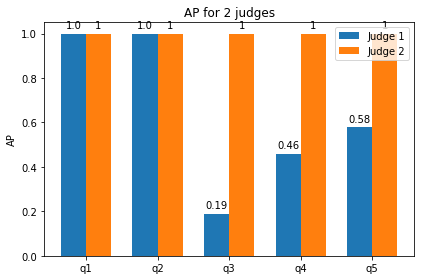

In [32]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['q1', 'q2', 'q3', 'q4', 'q5']


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, [1,1,0.19,0.46,0.58], width, label='Judge 1')
rects2 = ax.bar(x + width/2, [1,1,1,1,1], width, label='Judge 2')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('AP')
ax.set_title('AP for 2 judges')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in rects, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

<a id='search_engine'></a>
## The search engine
Below the actual code for the search engine. The <a href='#live_demo'>live demo</a> is at the end of the code.

In [33]:
import ipywidgets as widget
from ipywidgets import interact, interact_manual
import sys
import json
from elasticsearch import Elasticsearch
from elasticsearch import helpers
import pandas as pd
import datetime
import collections
import wikipedia
from IPython.display import clear_output
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 
import requests
import re

In [34]:
# setup host
#have elasticsearch running
HOST = 'http://localhost:9200/'
e = Elasticsearch(hosts=[HOST])

In [35]:
#load json file
filename = 'Movie_script.json'

with open(filename) as f:
    content = f.read()
    
datastore = json.loads(content)

In [36]:
#load data in elasticsearch
def gendata(datastore):
    for movie in datastore.keys():
        yield {
            "_index": "moviedata",
            "_type": "movie",
            "_id": movie, #movie id is the unique identifier 
            "doc": datastore[movie],
            
        }

helpers.bulk(e, gendata(datastore),request_timeout=100)

(617, [])

In [37]:
#query elasticsearch 
def get_results(key, value):
    #if searched for year or score use range
    if key in ['year', 'score']:
        query = {"size": 1000,
                    "query": {
                        "range" : {
                            key : {
                                "gte" : value[0],
                                "lte" : value[1]
                            }
                        }
                    }
                }
    
    #otherwise normal match query
    elif '"' in value:
        query = {'query' :
            {'match' : {key : value}
            },
         'highlight' : {
             'fields' : {
                 key : {}
             }
         }
        }
    else:
        query = {'query' :
            {'match' : {key : value}
            },
         'highlight' : {
             'fields' : {
                 key : {}
             }
         }
        }
    return e.search(body=query)['hits']

def getcounter(all_results):
    counter = {}
    
    resultnr = 0
    weging = 1
    #calculate weighted score
    #title has weight 3, year has 2, charachter and review score has 1
    for result in all_results:
        resultnr += 1
        if resultnr == 1:
            weging = 3
        if resultnr == 2:
            weging = 2
        if result:
            for hit in result['hits']:
                if hit['_id'] in counter:
                    counter[hit['_id']][1] += weging
                else:
                    counter[hit['_id']] = [hit, weging]
        weging = 1
    return list(counter.values())

#Exectue OR search
def orsearch(all_results, line):
    counter = getcounter(all_results)
    
    scorelist = []
    score = 0
    #compute normalized line score
    if line:
        #for all documents
        for document in counter:
            #Check how many query words match
            for word in line.split(' '):
                all_words = ' '.join(document[0]['_source']['doc']['lines']).split(' ')
                score =+ all_words.count(word)
            scorelist.append(score)
            score = 0
        #Normalize score between 0 and 2
        normalized = [((x - min(scorelist)) / (max(scorelist)-min(scorelist))) * 2 
                      if x != 0 else 0 for x in scorelist]
        for i in range(len(counter)):
            counter[i][1] += round(normalized[i],2)
        
    
    
    #Sort the results on score
    sortedcounter = sorted(counter, key=lambda x: x[1], reverse=True)
    return sortedcounter


def query(title,year,character,line,score,general):
    #If nothing is specified, return everything
    if title == '' and year == (1920,2020) and character == '' and line == '' \
    and score == (1.0,10.0) and general == '':
        query = {"size":1000,
             'query' : {
        'match_all' : {}
        }}

        all_docs = e.search(body=query)['hits']['hits']
        return [[x, 0] for x in all_docs]
        
    
    titleresult = {} 
    yearresult = {}
    charresults = {}
    scoreresult = {}
    lineresult = {}
    
    #If general search is used, supplement missing criteria
    if general:
        if not title:
            title = general
        if not character:
            character = general
        if not line:
            line = general
    #return results only for given criteria
    if title != None:
        titleresult = get_results('title', title)

    if character != None:
        charresults = get_results('all_characters', character.upper())
        
    if year != None and year != (1920, 2020):
        yearresult = get_results('year', year)
   
    if score != None and score != (1.0, 10.0):
        scoreresult = get_results('score', score)
 
    if line != None:
        lineresult = get_results('lines', line.lower())
    
    #return results in following format: [[hit, score],[hit, score]...[hit, score]]
    return orsearch([titleresult, yearresult, charresults, scoreresult, lineresult], line)

In [38]:
#create a wordcloud on the script of the returned result  
def make_word_cloud(hit):
    
    title = list(hit['_source']['doc']['title'])
    lines = hit['_source']['doc']['lines']
    characters = list(hit['_source']['doc']['characters'].keys())
    words = title+lines+characters
    #remove english stopwords
    stopwords = set(STOPWORDS) 
    comment_words = ''
    for val in words: 

        # typecaste each val to string 
        val = str(val) 

        # split the value 
        tokens = val.split() 

        # Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 

        for words in tokens: 
            comment_words = comment_words + words + ' '


    wordcloud = WordCloud(width = 800, height = 200, 
                    background_color ='white', 
                    stopwords = stopwords, 
                    min_font_size = 20).generate(comment_words) 

    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show()

In [39]:
#create histogram for years in which the movies were produced
def make_histogram(res):
    x=[hit[0]['_source']['doc']['year'] for hit in res]
    plt.hist(x=x, bins=100)
    plt.show()
    
# create histogram for genres of movies
def make_gengram(res):   
    y =[x[0]['_source']['doc']['genre'] for x in res]
    
    full = []
    for entry in y:
        full = full + entry
    plt.hist(x=full, bins = 30)
    plt.xticks(rotation = 45)
    plt.show()

In [40]:
def striphtml(data):
    data = data.replace('<em>', '\033[1m')
    data = data.replace('</em>', '\033[0m')
    return data

#Format results in human readable manner
def printingpress(hits):
    counter = 0
    for item in hits:
        #Print title, year, score and genre divided by |
        movietitle = item[0]['_source']['doc']['title']

        print(item[0]['_source']['doc']['title'], ' | ',
              item[0]['_source']['doc']['year'], ' | ',
              "Rating: ",item[0]['_source']['doc']['score'], ' | ', end='')
        for gen in item[0]['_source']['doc']['genre']:
            print(gen, ' ', end='')
        print( ' | ',"Score: ",round(item[1],2))
        #Print url to full script
        print('\nScript: ', item[0]['_source']['doc']['url'])
        
        #Try for wikipedia information  
        try:
            print('Wikipedia: ', wikipedia.page(movietitle).url)
            print('\nDiscription: \n', wikipedia.summary(movietitle)[:400] + '...')
        except:
            print('\nNo wikipedia information found')
        #Print all characters
        print('\nCharacters: ')
        for current in item[0]['_source']['doc']['all_characters']:
            char = current.split(' ')
            char = [x[0] + x[1:].lower() for x in char]
            char = ' '.join(char)
                
            if current == item[0]['_source']['doc']['all_characters'][:-1]:
                print(char) 
            else:
                print(char + ', ', end='') 
        print('\n\nSnippets:')
        
        lines = 0
        try:
            for line in item[0]['highlight']['lines']:
                lines += 1
                print(striphtml(line))
                if lines == 5:
                    break
        except:
            print("No snippets found")
        
        #Create a wordcloud        
        make_word_cloud(item[0])
        
        #limit results to top 10
        if counter == 9:        
            break
        
        #print division between results
        print('\n' + '_'*(len(item[0]['_source']['doc']['url']) + 10) + '\n')
        counter += 1

#Sort results on given genre(s)        
def filter_genres(results, genres):
    new_results =[]
    if 'all' in genres:
        return results
    
    for hit in results:
        result = hit[0]['_source']['doc']
        if 'unknown' in genres and result['genre']==[]:
                new_results.append(hit)
                
        if len([i for i in genres if i in result['genre']])>0: 
            new_results.append(hit)
        
    return new_results


genres = ['all','action', 'adult', 'adventure', 'animation', 'biography', 'comedy',
          'crime', 'documentary', 'drama', 
          'family', 'fantasy', 'film-noir', 'history', 'horror', 'music', 'musical', 'mystery', 'romance', 
          'sci-fi', 'short', 'sport', 'thriller', 'war', 'western', 'unknown']

<a id='live_demo'></a>
## Live demo

In [41]:
#Create IPyWidget for interactive search
search=widget.Text(value=None, placeholder='Please enter value',description='Search')
year=widget.IntRangeSlider(min=1920, max=2020, step=1, value=[1920,2020], description='Year')
score=widget.IntRangeSlider(min=1, max=10, step=1, value=[1,10], description='Review score')
genre=widget.SelectMultiple(options=genres,value=['all'],description='Genre')
title = widget.Text(value='', placeholder='please enter value', description='Title')
line = widget.Text(value='', placeholder='please enter value', description='Line')
character=widget.Text(value='',placeholder='please enter value', description='Character')
button = widget.Button(description="Search")

#layout
box_left = widget.VBox([year,score,genre])
box_right = widget.VBox([title,line,character])
box = widget.HBox([box_left,box_right])
advanced = widget.Accordion(children=[box])
advanced.set_title(0, 'Advanced Search')

final_box = widget.VBox([search, advanced])

# display everything
display(final_box)

# make button
output = widget.Output()

# display button
display(button, output)

def on_button_clicked(b):
    with output:
        clear_output()
        hits = query(title.value, year.value, character.value, line.value, score.value, search.value)
        if hits:
            hits = filter_genres(hits, genre.value)
            make_histogram(hits)
            make_gengram(hits)
            printingpress(hits)
        else:
            print('No results found')


button.on_click(on_button_clicked)

VBox(children=(Text(value='', description='Search', placeholder='Please enter value'), Accordion(children=(HBox(children=(VBox(children=(IntRangeSlider(value=(1920, 2020), description='Year', max=2020, min=1920), IntRangeSlider(value=(1, 10), description='Review score', max=10, min=1), SelectMultiple(description='Genre', index=(0,), options=('all', 'action', 'adult', 'adventure', 'animation', 'biography', 'comedy', 'crime', 'documentary', 'drama', 'family', 'fantasy', 'film-noir', 'history', 'horror', 'music', 'musical', 'mystery', 'romance', 'sci-fi', 'short', 'sport', 'thriller', 'war', 'western', 'unknown'), value=('all',)))), VBox(children=(Text(value='', description='Title', placeholder='please enter value'), Text(value='', description='Line', placeholder='please enter value'), Text(value='', description='Character', placeholder='please enter value'))))),), _titles={'0': 'Advanced Search'})))

Button(description='Search', style=ButtonStyle())

Output()